## Activation Functions

- Add non-linearity to the network (to model for complex relationships)
- sigmoid for binary classification (n_classes = 2)
- softmax for multi-class classification (n_classes = 3 or more)


todo: master list of activation functions for real world data science applications

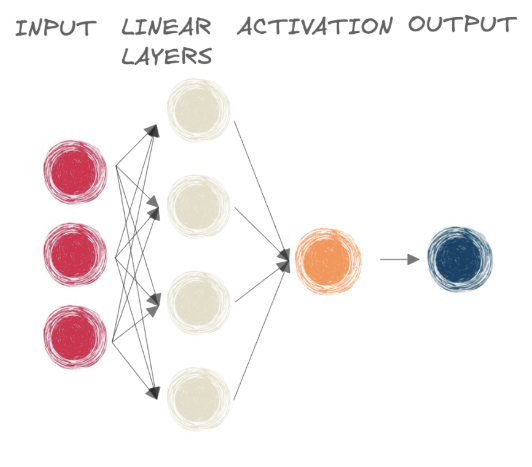

Pre-activation output passed to activation function



## Binary Classification

e.g. of Binary Classification
output of linear layers = 6    
6 is passed to activation function, output of activation function = p    
if p > 0.5, "class_a" is the outcome, else "class_b" is the outcome    


todo: sigmoid formula mention here

In [109]:
import torch
import torch.nn as nn

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


sigmoid = nn.Sigmoid()

print(sigmoid)
print(type(sigmoid))

Sigmoid()
<class 'torch.nn.modules.activation.Sigmoid'>


In [110]:
input_tensor = torch.tensor([[6]])

output = sigmoid(input_tensor) # deterministic
print(output)

tensor([[0.9975]])


In [111]:
my_model = nn.Sequential(
    nn.Linear(6, 4),  # Linear Layer 1 
    nn.Linear(4, 1),  # Linear Layer 2
    nn.Sigmoid()      # Activation layer
    )

## Multi-class Classification

In [112]:
import torch
import torch.nn as nn

# apply softmax along the last dimension of input tensor
softmax = nn.Softmax(dim = -1)
# todo: what params are there for softmax?

print(softmax)
print(type(softmax))

Softmax(dim=-1)
<class 'torch.nn.modules.activation.Softmax'>


In [113]:
input_tensor = torch.tensor([[4.3, 6.1, 2.3]])

output_tensor = softmax(input_tensor)   # probabilities, deterministic
print(output_tensor)

tensor([[0.1392, 0.8420, 0.0188]])


## Prediction
AKA Running a forward pass through the network
To Produce predictions based on learned params (weights and biases)

Final Output: Binary, Multi-class, Numerics (Regression)


todo: how do we know how many layers and neurons in each layer?


In [114]:
# 5 observations, 6 features
input_data = torch.tensor([
    [-0.4421, 1.5207, 2.0607, -0.3647, 0.4691, 0.0946],
    [-0.9155, -0.0475, -1.3645, 0.6336, -1.9520, -0.3398],
    [ 0.7406, 1.6763, -0.8511, 0.2432, 0.1123, -0.0633],
    [-1.6630, -0.0718, -0.1285, 0.5396, -0.0288, -0.8622],
    [-0.7413, 1.7920, -0.0883, -0.6685, 0.4745, -0.4245]
])

In [115]:
# Binary Classification
my_model = nn.Sequential(
    nn.Linear(6,4), # 6 features as inputs. 4 neurons in the layer, why? todo 
    nn.Linear(4,1), # 4 inputs. 1 output, why? todo
    nn.Sigmoid()
)
my_model(input_data)

tensor([[0.5043],
        [0.6727],
        [0.6172],
        [0.5815],
        [0.5964]], grad_fn=<SigmoidBackward0>)

In [116]:
# import numpy as np
# np.where(my_model(input_data) > 0.5, 1, 0) # numpy operations allowed

In [117]:
# Multi-class Classification (3 possible prediction classes)
my_model = nn.Sequential(
    nn.Linear(6, 4), 
    nn.Linear(4, 3), # 3 classes 
    nn.Softmax(dim=-1)
)
my_model(input_data)

# todo: how to interpret this
# interpretation: probabiblity of an observation belonging to classA, classB, classC
# Each observation's probability add up to 1

tensor([[0.3988, 0.1373, 0.4639],
        [0.2523, 0.3239, 0.4238],
        [0.3297, 0.2838, 0.3865],
        [0.2991, 0.1189, 0.5820],
        [0.3729, 0.1263, 0.5008]], grad_fn=<SoftmaxBackward0>)

In [118]:
# Regression
my_model = nn.Sequential(
    nn.Linear(6, 4), 
    nn.Linear(4, 1), # 1 output 
    # nn.Softmax(dim=-1) # no activation function in the end. todo: why not?
)
my_model(input_data) # 5 observations, 1 regression prediction for each row

tensor([[0.0703],
        [0.5241],
        [0.1540],
        [0.5696],
        [0.4147]], grad_fn=<AddmmBackward0>)

## Loss Function for Prediction Assessment

Loss Function tell us how good

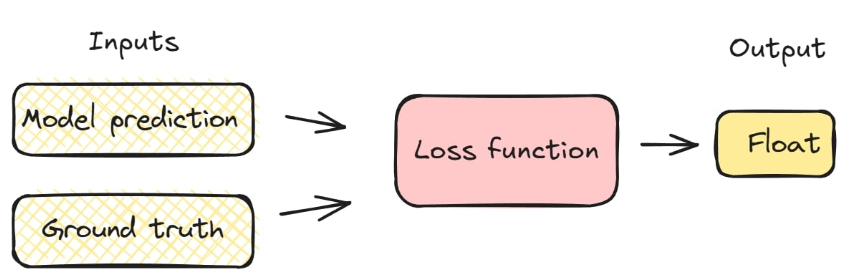

#### One Hot Encoding
y = actuals

y^= predicted. specifically, predictions before softmax
if 3-class prediction, y^ = [-5.2, 4.6, 0.8]

One-hot encoding: convert an integer y to a tensor of 0s and 1s

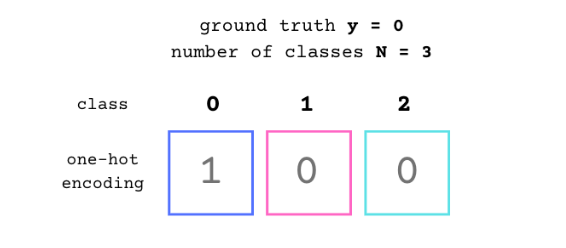


In [119]:
import torch.nn.functional as F

F.one_hot(torch.tensor(0), num_classes=3)
F.one_hot(torch.tensor(1), num_classes=3)
F.one_hot(torch.tensor(2), num_classes=3)
# F.one_hot(torch.tensor(3), num_classes=3) # error


F.one_hot(torch.tensor(2), num_classes=50)

tensor([1, 0, 0])

tensor([0, 1, 0])

tensor([0, 0, 1])

tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0])

#### Cross Entropy Loss
- Most common loss function for binary classification
    - The most frequently used loss function for multiclass classification problems is Cross Entropy Loss.
    - Mean Squared Error (MSE) Loss: Commonly used for regression problems.
    - Binary Cross Entropy Loss: Used for binary classification tasks.
    - Hinge Loss: Often used when training support vector machines (SVMs).
    - Negative Log Likelihood Loss: Common with classification problems in PyTorch.



<details><summary><strong>📖 Click to Expand</strong></summary>
Cross Entropy Loss — Hand Calculation Example

Problem: 3-class classification

Step 1: Scores (logits from model)
```
scores = [-5.2, 4.6, 0.8]
```

---

Step 2: Apply Softmax → Convert scores to probabilities
Formula: `softmax_i = exp(score_i) / Σ_j exp(score_j)`

Calculations:
- exp(-5.2) ≈ 0.0055
- exp(4.6) ≈ 99.484
- exp(0.8) ≈ 2.2255
- Denominator = 0.0055 + 99.484 + 2.2255 ≈ 101.715

Probabilities:
```
[0.000054, 0.978, 0.0218]
```

---

Step 3: Calculate Cross-Entropy Loss from probabilities
Formula: `loss = -log(prob_of_true_class)`

All 3 possible losses (depending on which class is true):

- If true class is Class 0 (one-hot: [1, 0, 0])
  - probability = 0.000054
  - Loss = -log(0.000054) ≈ 9.82

- If true class is Class 1 (one-hot: [0, 1, 0])
  - probability = 0.978
  - Loss = -log(0.978) ≈ 0.022

- If true class is Class 2 (one-hot: [0, 0, 1])
  - probability = 0.0218
  - Loss = -log(0.0218) ≈ 3.83

---

`Note`: Since one-hot encoding has only one "1" (the true class), cross-entropy loss produces just one scalar value per sample. Even though we have 3 probabilities, only the probability of the true class (where one-hot is "1") is used in the loss calculation. The other probabilities (where one-hot is "0") don't contribute to the loss.

`Summary`:
When the predicted probability for the true class is very low, the loss is high. This penalizes the model for making incorrect predictions with high confidence.

</details>


In [120]:
# Calculate the loss function for a prediction
from torch.nn import CrossEntropyLoss

one_hot_target = torch.tensor([1, 0, 0]) # same as y  (Actuals, classA, encoded as one-hot label)
scores = torch.tensor([-5.2, 4.6, 0.8])  # same as y^ (Predicted)

In [121]:
criterion = CrossEntropyLoss()
# my_loss = criterion(scores, one_hot_target) # datatype error
my_loss = criterion(scores.double(), one_hot_target.double()) # output float in above screenshot

print("Loss Determined:", my_loss)

Loss Determined: tensor(9.8222, dtype=torch.float64)


## Update Model Parameters

- By Minimizing Loss using Derivatives (AKA Gradients in Deep Learning)
- Weights & Biases are randomly initialized at model creation,
- They are updated during training using backward pass (back propogation) to reach the best loss value


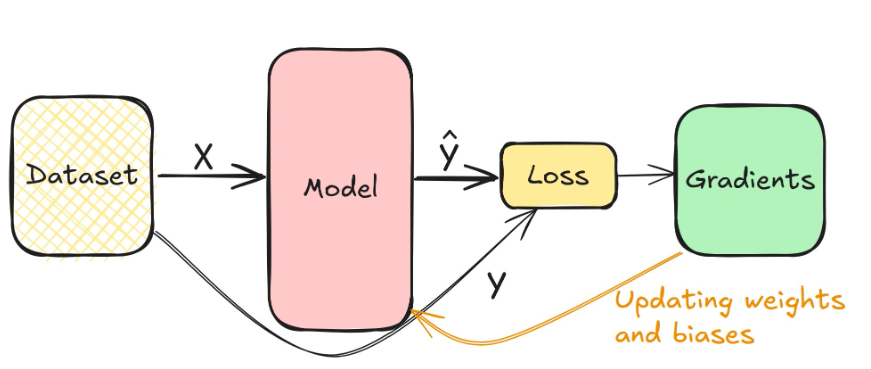

BackPropogation Direction

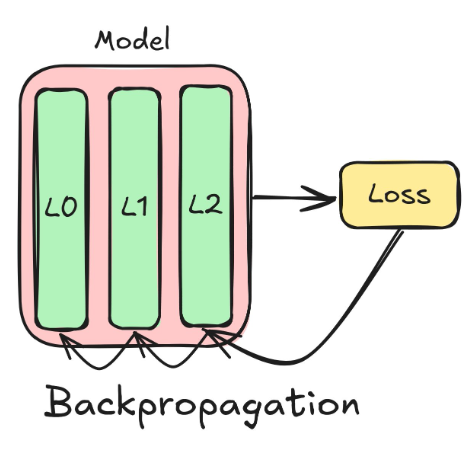

In [122]:
my_model = nn.Sequential(
    nn.Linear(16, 8),
    nn.Linear(8, 4),
    nn.Linear(4, 2) ,   
)

In [123]:
my_model
my_model[0]
my_model[0].weight
print(my_model[0].weight.grad) # todo: help me interpret this .grad
print(my_model[0].bias.grad) # todo: help me interpret this .grad

# # Layer 0
# my_model[0].weight.grad
# my_model[0].bias.grad

# # Layer 1
# my_model[0].weight.grad
# my_model[0].bias.grad

# # Layer 2
# my_model[0].weight.grad
# my_model[0].bias.grad

Sequential(
  (0): Linear(in_features=16, out_features=8, bias=True)
  (1): Linear(in_features=8, out_features=4, bias=True)
  (2): Linear(in_features=4, out_features=2, bias=True)
)

Linear(in_features=16, out_features=8, bias=True)

Parameter containing:
tensor([[-1.8323e-01, -8.9421e-02,  2.4801e-01,  1.5365e-01, -1.3422e-01,
         -1.4371e-01, -1.9896e-01, -6.2564e-02,  9.6120e-02,  6.8810e-02,
         -6.4292e-02,  1.6407e-01, -7.8156e-02,  5.9268e-03, -9.9270e-02,
         -4.6645e-02],
        [-1.3711e-01, -8.5758e-02, -2.3564e-01,  1.7361e-01, -1.0574e-01,
          1.6845e-01,  1.6832e-04,  1.3356e-01, -1.1023e-02,  1.0031e-01,
         -1.8460e-01, -1.3918e-02, -1.5547e-01, -2.3252e-01, -2.1521e-01,
         -1.5619e-01],
        [-2.3471e-01,  2.1614e-01,  1.5004e-01, -2.2072e-02, -1.1694e-01,
          2.3410e-01,  4.7668e-02, -6.7372e-02,  1.1587e-01,  5.2054e-03,
         -5.9186e-02,  2.2693e-01,  1.2791e-01,  8.4548e-02, -1.7781e-02,
          1.2992e-01],
        [ 2.0462e-01, -4.2659e-02,  2.0761e-01,  1.3125e-01, -1.8315e-01,
          6.2414e-03,  6.1658e-02,  2.4062e-01, -2.4596e-01, -2.1057e-01,
          1.9446e-01,  8.9832e-02,  5.6860e-02, -1.4494e-01, -7.1502e-02,
          1.8872e-01]

None
None


In [124]:
# Create small sample input and target for demonstration
import torch
import torch.nn as nn

# Assume batch size = 2, input features = 16 for my_model
sample = torch.randn(2, 16)
print("sample:", sample)

# For classification with 2 output classes (our last Linear outputs 2 units)
target = torch.tensor([0, 1])  # sample ground truth for CrossEntropyLoss
print("target:", target)

# Forward pass
prediction = my_model(sample)

# Calculate Loss & Gradients
criterion = CrossEntropyLoss()
loss = criterion(prediction, target)
loss.backward()

sample: tensor([[ 0.5157, -1.4638,  0.0756, -1.4792, -0.5924,  1.7344,  0.7210,  0.0115,
          0.3455,  0.1541, -1.1998, -1.7019,  0.3505, -0.4835, -0.3680,  2.5487],
        [ 0.3318, -0.0591,  1.2862, -1.1565, -1.1432,  0.4942,  0.6166,  0.8985,
          0.5974,  1.6821,  1.0883,  0.8166, -0.4263, -0.5759, -0.4757, -1.6958]])
target: tensor([0, 1])


In [125]:
# # junk code
# # updating model parameters manually

# # set learning rate, typically small
# lr = 0.001 

# # update weights
# weight = my_model[0].weight
# weight_grad = my_model[0].weight.grad
# weight = weight - lr * weight_grad

# # update biases
# bias = my_model[0].bias
# bias_grad = my_model[0].bias.grad
# bias = bias - lr * bias_grad


#### Gradient Descent
- For non-convex functions, use gradient descent
- PyTorch simplifies it using optimizers (Stochastic Gradient Descent SGD)

In [126]:
import torch.optim as optim

# Initilize the optimizer
optimizer = optim.SGD(my_model.parameters(), lr = 0.001) 

# update the parameter
optimizer.step() # todo: explanation please

